<a href="https://colab.research.google.com/github/Phanindhra-Reddy/Data-Analytics/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1eFy9nrQ_Mb1-z9fiYzobZAJCWQVzKVvG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eFy9nrQ_Mb1-z9fiYzobZAJCWQVzKVvG
To: /content/MNIST.csv
100% 699M/699M [00:06<00:00, 105MB/s]


In [2]:
# Loading all the necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [3]:
# Read the MNIST dataset and convert the type using pandas.
#This data set contains all the Images in data form
data = pd.read_csv(r"MNIST.csv").astype('float32')

In [4]:
data.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("shape ",data.shape)
data.info()

shape  (372450, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [6]:
#Preparation for the Machine Learning Model we have to get the X and Y axis.
#In X axis we are droping the first column
#The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read
X = data.drop('0',axis = 1)
y = data['0']#and put the 0 column in the label y
#IN this step Machine learning Model preparation for spliting test and Train data. We
#Test size would be your choise here we put it 0.2 % data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
print("shape of train_x ",train_x.shape)
print("shape of test_x ",test_x.shape)

shape of train_x  (297960, 784)
shape of test_x  (74490, 784)


In [7]:
#The below step  is to reshape the Image and Label data according to our requirement
#shape size would be [28,28]
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)
#After printing you will get the Train Data "Train data shape:  (297960, 28, 28)"
#After printing you will get the Test Data "Test data shape:  (74490, 28, 28)"
# converting floating point value to integer value of the labels
#This is the self made dictionary of Alphabets agains number 0 will be A , 1 will be B and so on
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [8]:
# Plotting the number of alphabets in the dataset #
#The below step is used to convert the any Labels number to integers 
#Firstly we convert the labels into integer values and append into 
#the count list according to the label. 
#This count list has the number of images present in the dataset belonging to each alphabet.
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1


In [9]:
#We get the list named alphabets for the Comparision purpose 
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
alphabets[6]

'G'

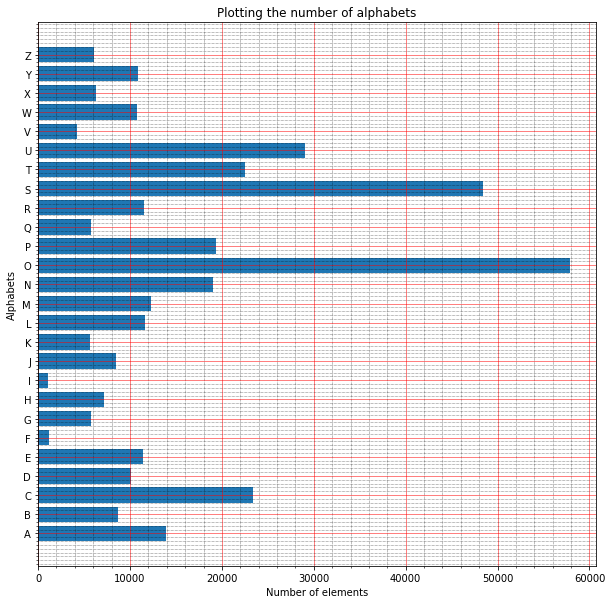

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

#We are ploting the bar graph of size 10 , 10
#In which we can clearly see that Alphabets "o" frequency is greater than 50,000 

# naming the x axis
plt.xlabel("Number of elements")
# naming the y axis
plt.ylabel("Alphabets")
# giving a title  
plt.title("Plotting the number of alphabets")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

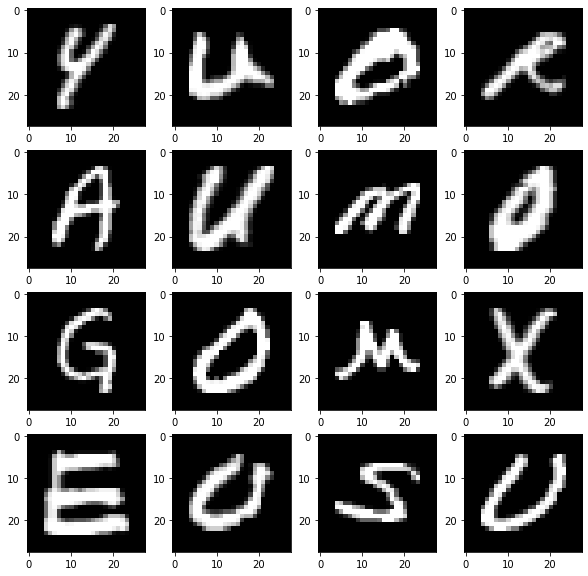

In [12]:
# Shuffling the data
#Here we will shuffle the images data to get the random alphabets for accuracy purpose. 
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(4,4, figsize = (10,10))
axes = ax.flatten()
for i in range(16):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap=plt.get_cmap('gray'))

plt.show()

In [14]:
# Reshape data for model creation

#Data Reshaping
#We changed the Images reshaping to "New shape of train data:  (297960, 28, 28, 1)" 
#For both Train and Test data
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)
#Here we convert the single float values to categorical values.
#This is done as the CNN model takes input of labels & generates 
#the output as a vector of probabilities.
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)


The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


In [15]:
# model creation

#CNN stands for Convolutional Neural Networks that are used to extract
#the features of the images using several layers of filters.
# Tensor Flow has different features and CNN is one of them. Its getting the data as a input
# Then its convolute the images with many different layers
# After Convoluation there are pooling layers
# The convolution layers are generally followed by maxpool layers that are used to reduce the
# number of features extracted and ultimately the output of the maxpool and layers
# and convolution layers are flattened into a vector of single dimension and are given as an 
#input to the Dense layer

#An instance of sequential class is created to add the layers
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
#output size of the layer is 64,128
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))
# compiling and fitting model

# After adding the layers on the model we have finally in situtation to compile and fit the Model.
# Here you can check the accuracy is upto the mark. More than 95%
#where we define the optimizing function & the loss function to be used for fitting.
#The optimizing function used is Adam,(Tensorflow - > You can check the literature of it also)
#that is a combination of RMSprop & Adagram optimizing algorithms.
#loss: 0.1576 - accuracy: 0.9569 - val_loss: 0.0840 - val_accuracy: 0.9767
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

# save model
model.summary()
model.save(r'model_hand.h5')
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

9312/9312 [==============================] - 444s 48ms/step - loss: 0.1574 - accuracy: 0.9575 - val_loss: 0.0806 - val_accuracy: 0.9776
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)      

In [17]:
history.history

{'loss': [0.1574440449476242],
 'accuracy': [0.9575244784355164],
 'val_loss': [0.08058705925941467],
 'val_accuracy': [0.9775809049606323]}

In [18]:
from keras.models import load_model
#Here we will save the Model
model = load_model('model_hand.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

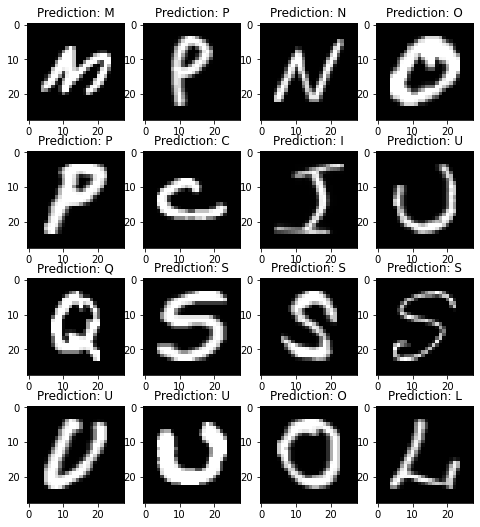

In [19]:
# Prediction on test data

# Now we will finally have the things to show on the graph we are getting 9 images from
# The train set 
fig, axes = plt.subplots(4,4, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the 
# images on the basis of CNN model of keras/tensorflow. 
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)

In [20]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 137ms/step


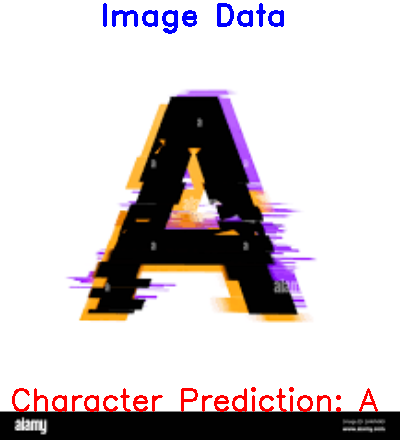

In [22]:
# Predection on External Image

# All the images are correct by the CNN model 
# Here we can upload our JPG image to the project and we will see it will work correctly or not
img = cv2.imread(r'a1.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

#Gaussain Method used for Blur checking
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX , fontScale= 1, thickness=2, color = (255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1, thickness=2, color = (0,0,255))
cv2_imshow(img)